In [89]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

leo = pd.DataFrame([[9,9,9,8,8,8]], columns=["n1", "n2", "n3", "n4", "n5", "n6"])
leo.T.var()

0    0.3
dtype: float64

In [2]:
dados = pd.read_csv("data/Alchool/student-mat.csv")

In [3]:
dados = dados.rename(columns={"age": "idade", "Medu": "EduMae", "Fedu":"EduPai", "traveltime":"tempoAteEscola",
                             "studytime":"horaEstudoSemanal", "failures":"reprovacoes", "famrel":"nivelRelacaoFamiliar",
                             "freetime":"tempoLivre", "goout":"saiComAmigos", "Dalc":"consumoDiaSemana", 
                              "Walc":"consumoFimDeSemana", "health":"saudeAtual", "absences":"faltas", 
                              "G1":"notaPrimeroPeriodo", "G2":"notaSegundoPeriodo", "G3":"notaTerceiroPeriodo",
                             "school":"escola", "sex":"sexo", "Mjob":"trabalhoMae", "Fjob": "trabalhoPai",
                             "address":"ondeMora", "famsize":"tamanhoFamilia", "Pstatus":"statusPai",
                             "Mstatus":"statusMae", "reason":"porqueEscolheuEscola", "guardian":"guarda",
                             "schoolsup":"ajudaExtraEdu", "famsup":"ajudaExtraFamilia", "paid":"aulasExtraPaga",
                             "activities":"extracurricular", "nursery":"foiAoMaternal", "higher":"querFaculdade",
                             "internet":"internetEmCasa", "romantic":"emRelacionamento"})
# dados.describe()

In [75]:
# dados["ajudaExtraFamilia"].value_counts(normalize=True)*100
dados.head().T
# dados.columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(dados[['escola']]).toarray(), columns=dados['escola'].unique())

# dados_j = dados.join(enc_df)
# dados.iloc[:,23:].head()
# enc_df.tail()

# enc.fit_transform(dados[['escola']]).toarray().shape
# enc.fit_transform(dados[['escola']]).toarray()
dados.describe()

,idade,EduMae,EduPai,tempoAteEscola,horaEstudoSemanal,reprovacoes,nivelRelacaoFamiliar,tempoLivre,saiComAmigos,consumoDiaSemana,consumoFimDeSemana,saudeAtual,faltas,notaPrimeroPeriodo,notaSegundoPeriodo,notaTerceiroPeriodo
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [45]:
# pd.get_dummies(dados.head().tamanhoFamilia)
dados_j.head().T

,0,1,2,3,4
escola,GP,GP,GP,GP,GP
sexo,F,F,F,F,F
idade,18,17,15,15,16
ondeMora,U,U,U,U,U
tamanhoFamilia,GT3,GT3,LE3,GT3,GT3
statusPai,A,T,T,T,T
EduMae,4,1,1,4,3
EduPai,4,1,1,2,3
trabalhoMae,at_home,at_home,at_home,health,other
trabalhoPai,teacher,other,other,services,other


In [12]:
frequencia = pd.crosstab(dados.sexo, dados.trabalhoPai)
frequencia
# print(dados.sexo.value_counts())
# print(dados.EduPai.value_counts())
# dados = dados.groupby("address").aggregate("mean").plot.bar(figsize=(10,7.5))
# dados_ = dados.groupby("address").aggregate("mean")
# dados_

# plt.figure(figsize=(12,6))
# sns.countplot(x='consumoDiaSemana', hue='sexo', data=dados)
# # sns.scatterplot(data=dados, x="consumoDiaSemana", y="notaPrimeroPeriodo", hue="ondeMora")

# plt.title('Teste')
# plt.show()

trabalhoPai,at_home,health,other,services,teacher
sexo,,,,,
F,14,12,111,58,13
M,6,6,106,53,16


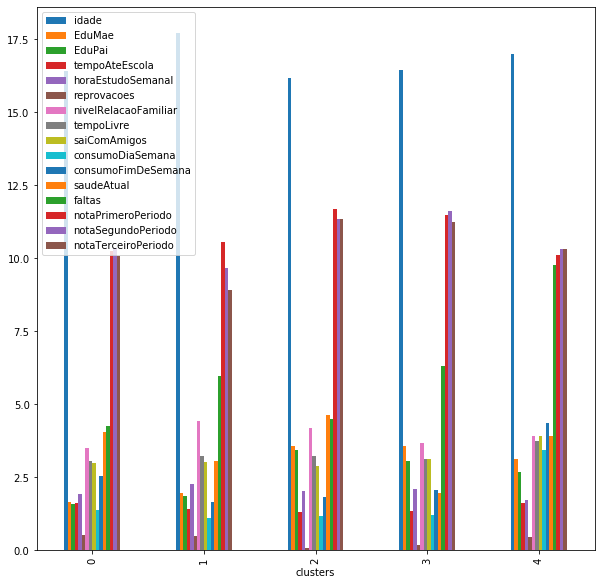

In [19]:
# scaler = StandardScaler()

features_escaladas = scaler.fit_transform(dados[["idade", \
                                                 "EduMae", \
                                                 "EduPai", \
                                                 "consumoDiaSemana", \
                                                 "consumoFimDeSemana", \
                                                 "nivelRelacaoFamiliar", \
                                                 "saudeAtual"]])
# print(features_escaladas)

# data_array = dados[["idade", "EduMae", "EduPai", "consumoDiaSemana", 
# "consumoFimDeSemana", "nivelRelacaoFamiliar", "saudeAtual"]]
data_array = features_escaladas
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
dados["clusters"] = kmeans.fit_predict(data_array)

dados.head()
# dados.groupby("clusters").aggregate("mean")
obj = dados.groupby("clusters").aggregate("mean")
# kmeans.cluster_centers_
obj.plot.bar(figsize=(10,10))
# obj

# dados[dados["clusters"] == 2]

# dados.values

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

[[ 1.         -0.94374034]
 [-0.94374034  1.        ]]
[-0.79190419]
1.21604110741756


Text(0, 0.5, 'Y')

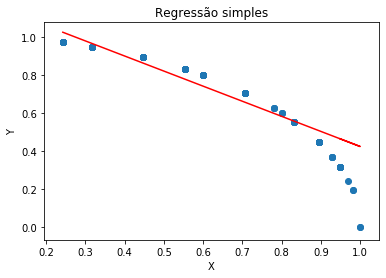

In [84]:
data = dados[["consumoDiaSemana", "EduPai"]]
data.head()
values = Normalizer().fit_transform(data.values)


X = values[::,0]
y = values[::,1]

regressor = LinearRegression()

corr = np.corrcoef(X,y)

X = X.reshape(-1,1)
# # X
regressor.fit(X,y)

print(corr)
print(regressor.coef_)
print(regressor.intercept_)

plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color="red")
plt.title("Regressão simples")
plt.xlabel("X")
plt.ylabel("Y")

In [10]:
dados.head()

,escola,sexo,idade,ondeMora,tamanhoFamilia,statusPai,EduMae,EduPai,trabalhoMae,trabalhoPai,...,nivelRelacaoFamiliar,tempoLivre,saiComAmigos,consumoDiaSemana,consumoFimDeSemana,saudeAtual,faltas,notaPrimeroPeriodo,notaSegundoPeriodo,notaTerceiroPeriodo
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)
